# Statistical Inference

In the slides you saw how, if you understand the sampling distribution of a statistic, you can compute a confidence interval. In this notebook, you'll see how to use Python to create these confidence intervals.

## Confidence Intervals

**Big Idea:** Create an interval so that C\% of the time, the parameter of interest lands within that interval (C is the confidence level - typically 95\% or 99\%).

A confidence interval lets you quantify the uncertainty associated with a point estimate. Wider interval means more uncertainty.

**General Formula for Confidence Interval:**

$$ \text{point estimate} \pm \text{margin of error} $$

In the case that you can approxmiate the sampling distribution of the statistic of interest (most commonly in the case of a mean or proportion), then you can express the margin of error in terms of the standard deviation of this distribution (the *standard error of the estimate*) and a critical value, which is based on the confidence level.

$$ \text{point estimate} \pm \text{standard error of estimate} \cdot \text{critical value}$$

Higher confidence means larger critical value and hence, a wider interval.

Also, you know that the standard error of the estimate shrinks as sample size increases, so you can get a narrower confidence interval by taking a larger sample.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Confidence Intervals for the Mean

You have seen from the slides how to create a confidence interval for the mean. In Python, you'll use the `t.interval` function from `scipy.stats`.


In this example, you will be using data from the [American Time Use Survey](https://www.bls.gov/tus/). Specifically, you'll be looking at a sample of 50 adults and the number of minutes they reported sleeping for the survey day.

In [2]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [3]:
sleeping.head()

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male


First, look at the distribution of the sample values.

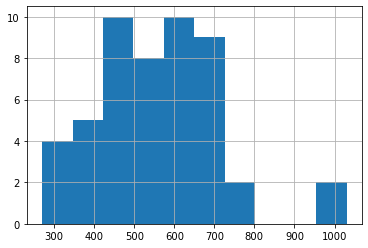

In [4]:
sleeping['minutes_spent_sleeping'].hist();

In order for your confidence interval to be valid, you need to make sure that the data is reasonably close to normally distributed. This can be relaxed if you have a large enough sample, but with only 50 observations, it is best to check for normality.

Recall that you can check for normality by looking at a Q-Q plot.

In [5]:
from nssstats.plots import qq_plot

/home/michael/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


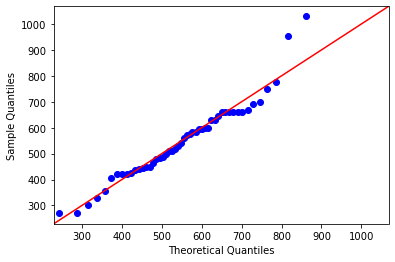

In [6]:
qq_plot(sleeping['minutes_spent_sleeping'])

It is not perfect, but with the exception of a couple of very high values, it looks reasonably close to a normal distribution.

Now, find the point estimate you will use for the mean. You can use the sample mean as the point estimate:

In [7]:
sleeping['minutes_spent_sleeping'].mean()

550.96

Also, look to see how much variability there is in the sample by calculating the standard deviation:

In [8]:
sleeping.minutes_spent_sleeping.std()

151.60070539925277

You can see that on average, people in this sample slept for 550.96 minutes (9.18 hours), but there is a lot a variability in the reported values. 

Armed with this knowledge, construct your confidence interval. Do this by using the `t` function from the scipy stats module.

In [9]:
from scipy.stats import t, norm, sem

To use this function, you need to specify 4 things:
* alpha: The confidence level
* df: The number of degrees of freedom for the $t$-distribution, equal to the the sample size - 1
* loc: The sample mean
* scale: The standard error, equal to $\frac{s}{\sqrt{n}}$  

Let's first look at the standard error.

Recall that this is an estimate of the variability in the sample means across all possible samples with the same size as our sample.

You can manually calculate it: 

In [10]:
sleeping['minutes_spent_sleeping'].std() / np.sqrt(len(sleeping['minutes_spent_sleeping']))

21.439577364095136

Or we can use the `sem` function:

In [11]:
sem(sleeping['minutes_spent_sleeping'])

21.439577364095133

Passing all of these values into the `t.interval` function, you can get a 95% confidence interval as follows:

In [12]:
t.interval(alpha = 0.95, 
           df = len(sleeping['minutes_spent_sleeping']) - 1, 
           loc = np.mean(sleeping['minutes_spent_sleeping']), 
           scale = sem(sleeping['minutes_spent_sleeping']))

(507.875556291199, 594.044443708801)

You can be 95% confident that the population mean is between 507 minutes and 594 minutes.

In this case, what is the margin of error?  

For the case of a t-interval, the margin of error is equal to the distance from the point estimate to either the upper or lower bounds of the confidence interval. Recall from above that the point estimate was 550.96.

In [16]:
conf_int = t.interval(alpha = 0.95, 
           df = len(sleeping['minutes_spent_sleeping']) - 1, 
           loc = np.mean(sleeping['minutes_spent_sleeping']), 
           scale = sem(sleeping['minutes_spent_sleeping']))

In [17]:
conf_int[1] - sleeping['minutes_spent_sleeping'].mean()

43.08444370880102

In [18]:
sleeping['minutes_spent_sleeping'].mean() - conf_int[0]

43.08444370880102

Notice that, due to the symmetry of the confidence interval, you get the same margin of error for either difference.

What happens if we change our confidence level? Create a new confidence interval, but this time do an 80\% confidence interval.

In [19]:
# Your Code Here

**Question:** How does the margin of error change from the margin of error for the 95\% confidence interval? Why do you think that is?

In [20]:
# Your Code Here

Now, create a 99\% confidence interval. What happens with the margin of error now?

In [21]:
# Your Code Here

**Question:** What can we say in general about the confidence level and the margin of error?

## Confidence Intervals for the Proportion

For this example, you'll be working wit a sample of 250 participants in the 2015 [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/index.htm) who were at least 18 years old.

Specifically, using this sample, estimate the proportion of US adults who smoke. In this dataset, there is a column indicating whether the person smoked tobacco in the last five days, so you can use this to make your estimate.

In [24]:
smoking = pd.read_csv('../data/NHANES_smoking.csv')
smoking.head()

,SEQN,age,smoked_in_last_5_days
0,89458.0,70.0,False
1,93352.0,40.0,False
2,92045.0,40.0,False
3,86461.0,31.0,False
4,84212.0,67.0,False


First, let's take a look at the data and see how it is divided between the two categories:

In [25]:
smoking['smoked_in_last_5_days'].value_counts()

False    196
True      54
Name: smoked_in_last_5_days, dtype: int64

In [26]:
smoking['smoked_in_last_5_days'].value_counts(normalize = True)

False    0.784
True     0.216
Name: smoked_in_last_5_days, dtype: float64

Based on the sample, the point estimate for the proportion of adults who smoked in the last 5 days is 21.6%.

Now, create our confidence interval.

Confidence intervals for the proportion can be constructed using the `proportion_confint` function from the `statsmodels.stats.proportion` module.

In [27]:
from statsmodels.stats.proportion import proportion_confint

To use this function, you need to specify
* count: The number of "successes"
* nobs: the total number of observations
* alpha: 1 - confidence level

**Warning:** This function treats alpha differently than the confidence interval function above, where alpha corresponded to the confidence level.

If you want to get the count of people who did smoke in the last 5 days, you can use `.loc`

In [28]:
smoking['smoked_in_last_5_days'].value_counts().loc[True]

54

To get the total number of observations, we can sum up the value counts. 

In [31]:
smoking['smoked_in_last_5_days'].value_counts().sum()

250

In [32]:
proportion_confint( count = smoking['smoked_in_last_5_days'].value_counts().loc[True],
                   nobs = smoking['smoked_in_last_5_days'].value_counts().sum(),
                   alpha = 0.05
                  )

(0.16498909910493145, 0.2670109008950685)

This shows that we can be 95% confident that the true proportion of US adults who regularly smoke tobacco is between 16.5% and 26.7%.